In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 12
plt.style.use("seaborn")
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C:\Users\ndpan\AppData\Local\Temp\ipykernel_9144\3540365057.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [4]:
loan_data_df = pd.read_csv("LoanApplicantData.csv")

In [5]:
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data_df.shape

(614, 13)

In [7]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_data_df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
loan_data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_data_df["Loan_Status"] = loan_data_df["Loan_Status"].map({"Y" : 1, "N" : 0})

In [11]:
loan_data_df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [12]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Loan_Status"):
    """A function for plotting the distribution of numerical variables and its effect on Loan_Status"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by].dropna(), ax=ax[1], kde=False)
    
    plt.show()

In [13]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Loan_Status"):
    
    """A function for Plotting the effect of variables(categorical data) on Loan_Status """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Loan_Status",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Loan_Status",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Loan_Status")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Loan_Status rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Loan_Status)")
    plt.tight_layout()

    plt.show()

In [14]:
numeric_var_names = [key for key in dict(loan_data_df.dtypes) if dict(loan_data_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
print(numeric_var_names)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


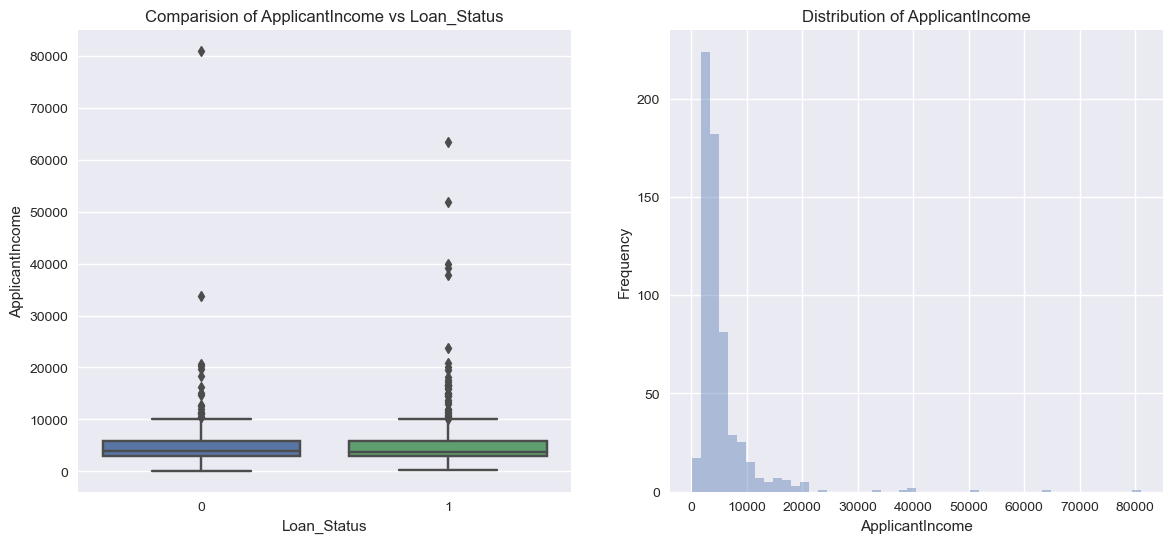

In [15]:
NumericalVariables_targetPlots(loan_data_df, segment_by="ApplicantIncome")

In [16]:
print("Max of Applicant Income:", loan_data_df["ApplicantIncome"].max())
print("Max of Applicant Income:", loan_data_df["ApplicantIncome"].min())

Max of Applicant Income: 81000
Max of Applicant Income: 150


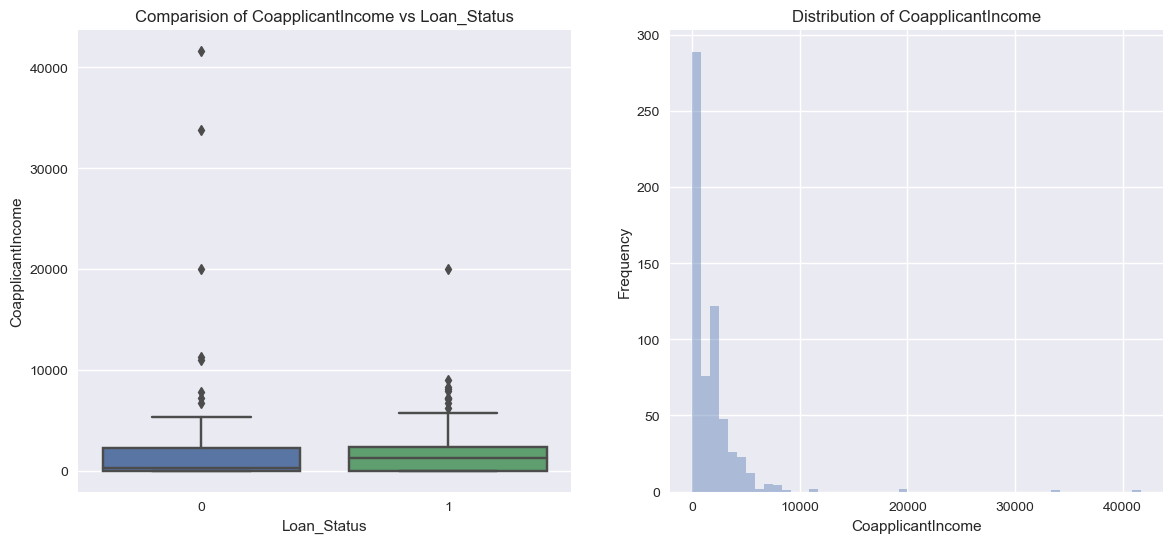

In [17]:
NumericalVariables_targetPlots(loan_data_df, segment_by="CoapplicantIncome")

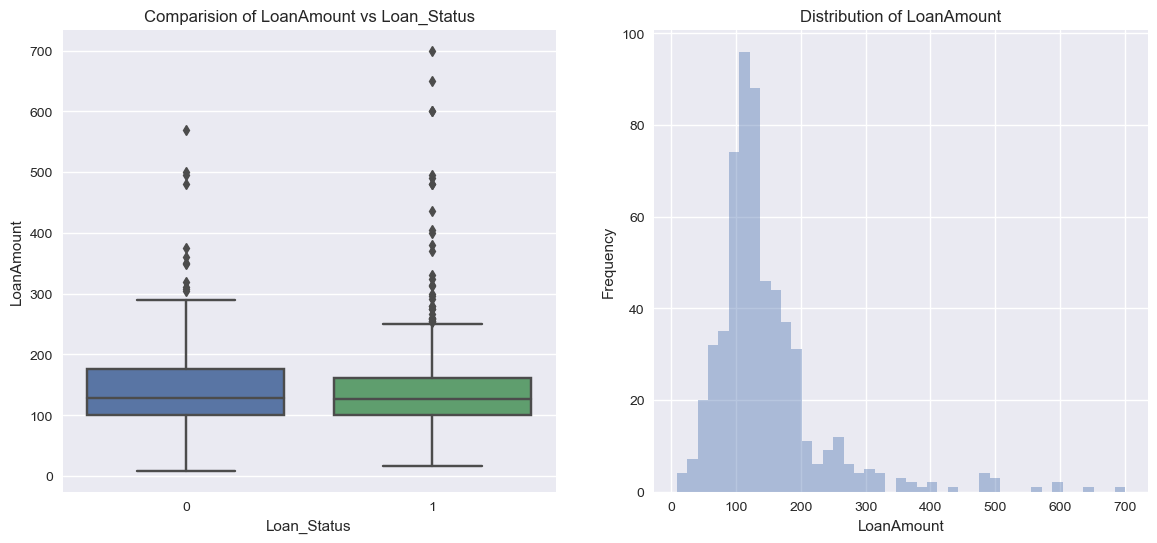

In [18]:
NumericalVariables_targetPlots(loan_data_df, segment_by="LoanAmount")

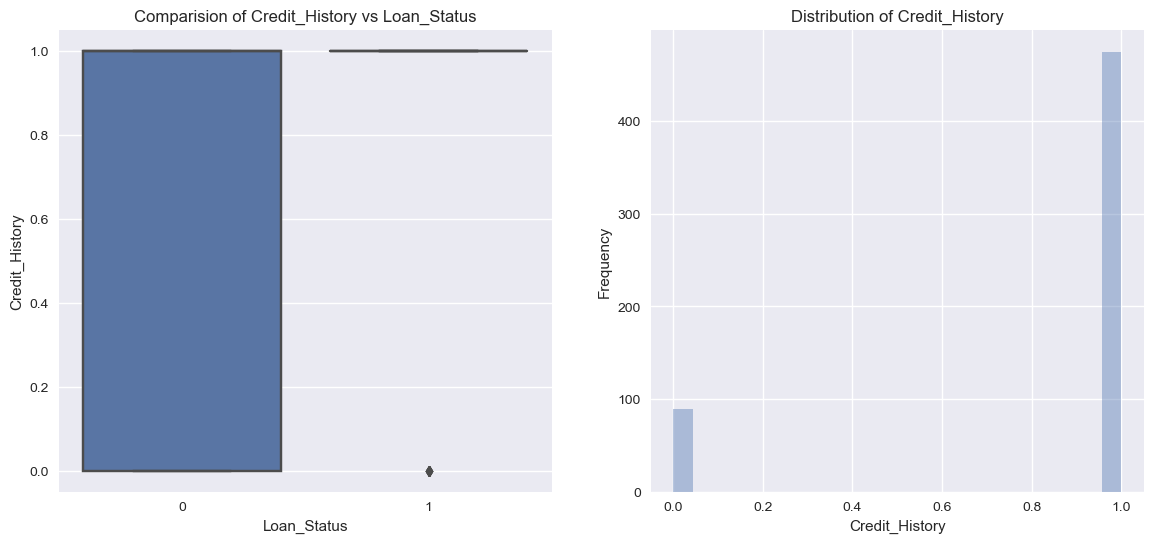

In [19]:
NumericalVariables_targetPlots(loan_data_df, segment_by="Credit_History")

In [20]:
catgorical_var_names = [key for key in dict(loan_data_df.dtypes) if dict(loan_data_df.dtypes)[key] in ['object']]
print(catgorical_var_names)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


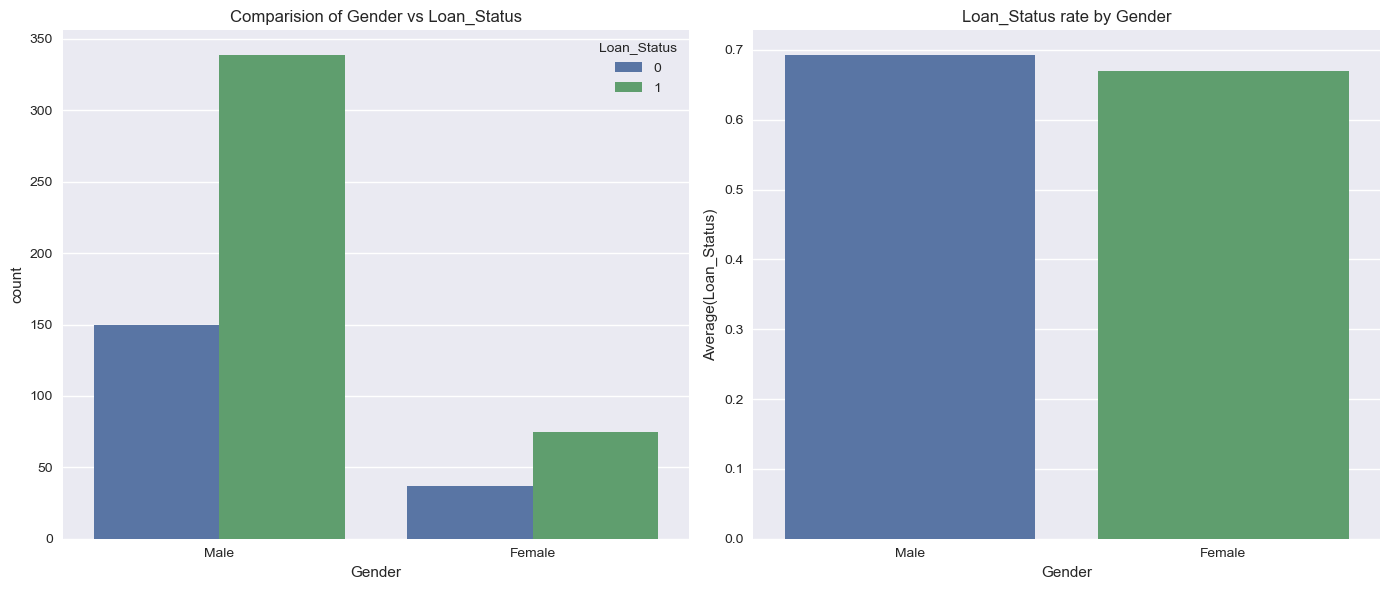

In [21]:
CategoricalVariables_targetPlots(loan_data_df,"Gender")

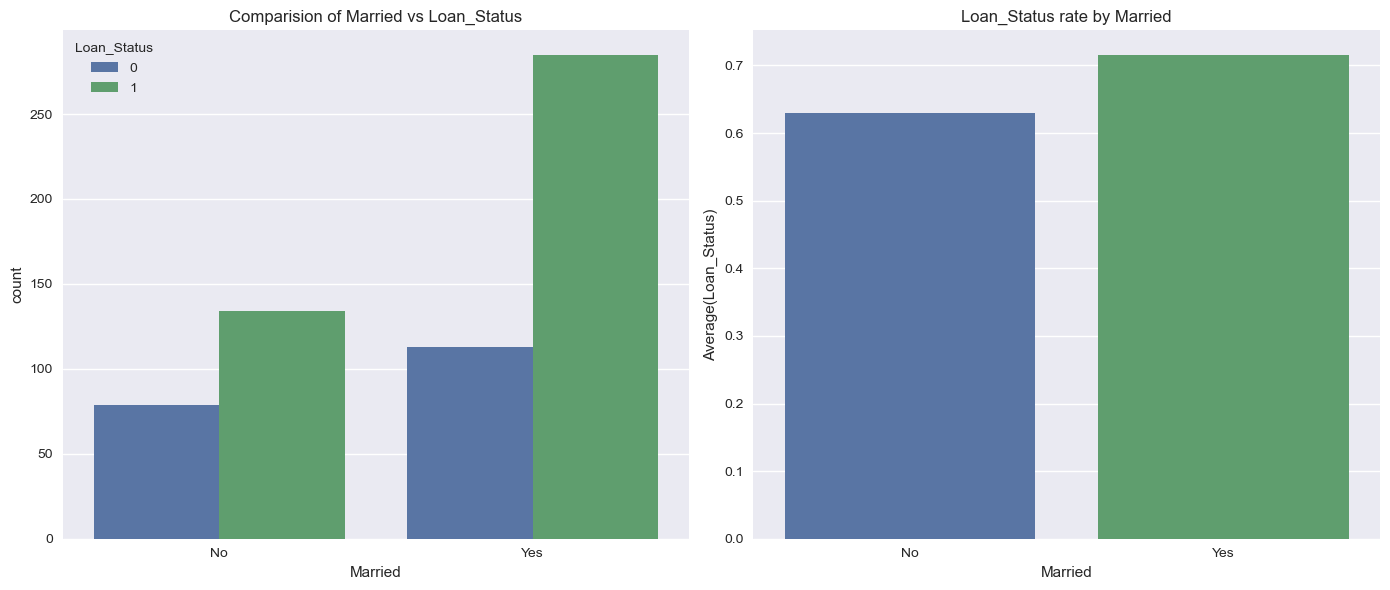

In [22]:
CategoricalVariables_targetPlots(loan_data_df,"Married")

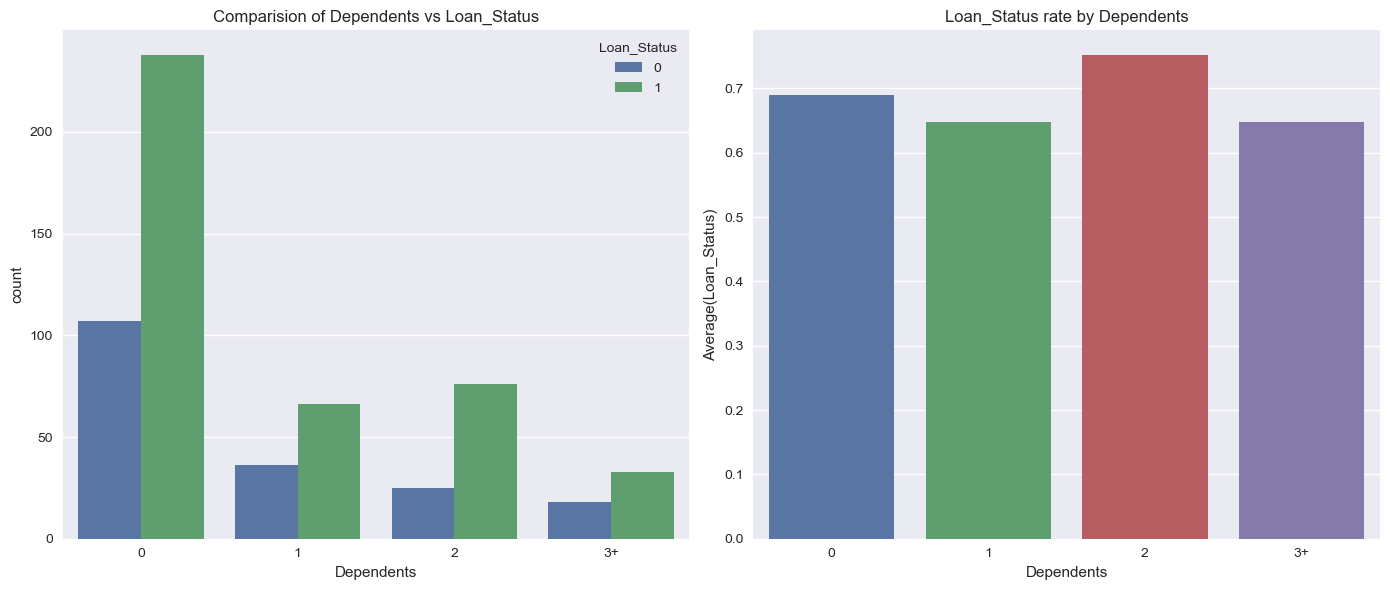

In [23]:
CategoricalVariables_targetPlots(loan_data_df,"Dependents")

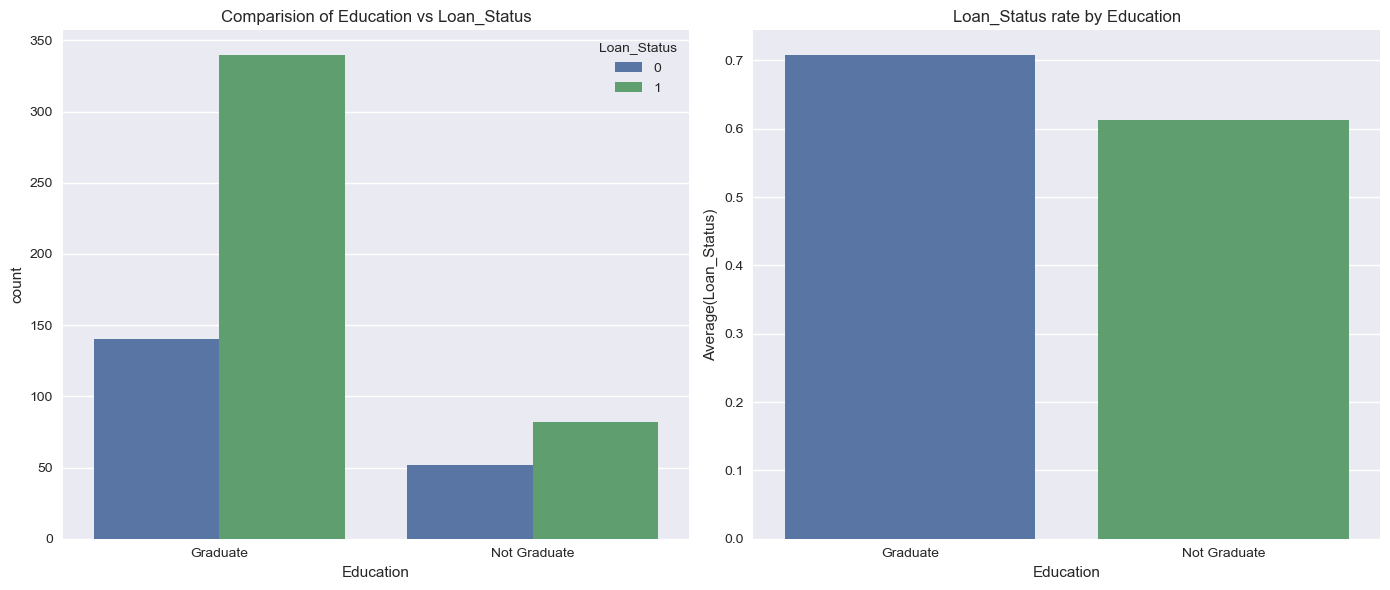

In [24]:
CategoricalVariables_targetPlots(loan_data_df,"Education")

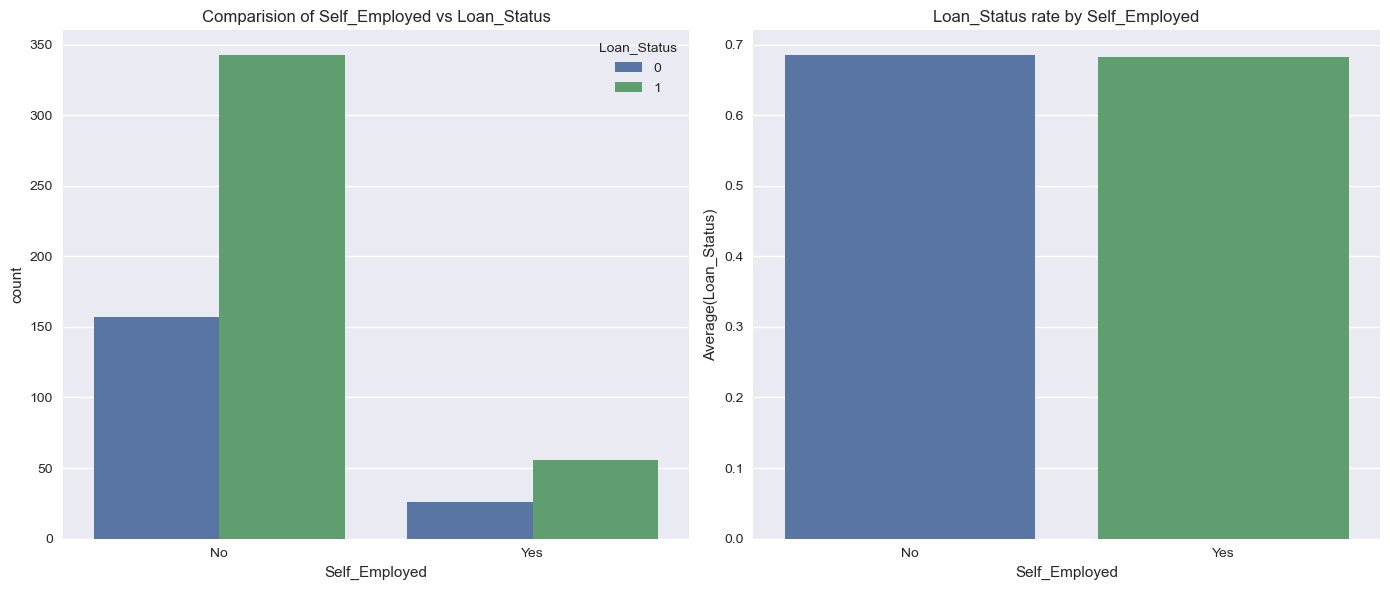

In [25]:
CategoricalVariables_targetPlots(loan_data_df,"Self_Employed")

In [26]:
loan_data_df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
loan_data_df["Gender"] = loan_data_df["Gender"].fillna(loan_data_df["Gender"].mode()[0])
loan_data_df["Married"] = loan_data_df["Married"].fillna(loan_data_df["Married"].mode()[0])
loan_data_df["Dependents"] = loan_data_df["Dependents"].fillna(loan_data_df["Dependents"].mode()[0])
loan_data_df["Self_Employed"] = loan_data_df["Self_Employed"].fillna(loan_data_df["Self_Employed"].mode()[0])

In [28]:
loan_data_df["LoanAmount"] = loan_data_df["LoanAmount"].fillna(loan_data_df["LoanAmount"].median())
loan_data_df["Loan_Amount_Term"] = loan_data_df["Loan_Amount_Term"].fillna(loan_data_df["Loan_Amount_Term"].median())
loan_data_df["Credit_History"] = loan_data_df["Credit_History"].fillna(loan_data_df["Credit_History"].median())

In [29]:
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [30]:
loan_data_encoded_df = loan_data_df.copy()

In [31]:
loan_data_encoded_df["Gender"] = loan_data_df["Gender"].map({"Male": 1, "Female": 0})

#convert the Married variable Yes to 1 and No to 0
loan_data_encoded_df["Married"] = loan_data_df["Married"].map({"Yes" : 1, "No" : 0})

#convert the Self_Employed variable Yes to 1 and No to 0
loan_data_encoded_df["Self_Employed"] = loan_data_df["Self_Employed"].map({"Yes" : 1, "No" : 0})

#education: there is an order inolved. Graduate > Not graduate
loan_data_encoded_df["Education"] = loan_data_df["Education"].map({"Graduate" : 2, "Not Graduate" : 1})

#education: there is an order inolved. Graduate > Not graduate
loan_data_encoded_df["Property_Area"] = loan_data_df["Property_Area"].map({"Rural" : 1, "Semiurban" : 2, "Urban" : 3})

#replace dependents 3+ with 3.
loan_data_encoded_df["Dependents"] = loan_data_df["Dependents"].map({"3+" : 3, "1": 1, "2": 2, "0" : 0})

In [32]:
loan_data_encoded_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,2,0,5849,0.0,128.0,360.0,1.0,3,1
1,LP001003,1,1,1,2,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,2,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,0,0,2,0,6000,0.0,141.0,360.0,1.0,3,1


In [33]:
loan_data_encoded_df.drop(["Loan_ID"], axis = 1, inplace=True)

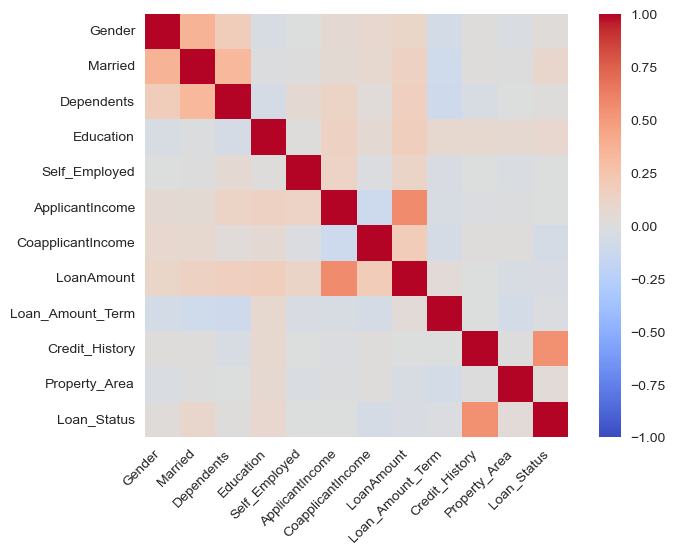

In [34]:
corr_matrix = loan_data_encoded_df.corr()

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [35]:
featurecolumns = loan_data_encoded_df.columns.difference(['Gender', 'Loan_Status'])
featurecolumns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'LoanAmount', 'Loan_Amount_Term', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')

In [36]:
X = loan_data_encoded_df[featurecolumns]
y = loan_data_encoded_df["Loan_Status"]

In [37]:
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [38]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 100)

In [39]:
y_train.value_counts(normalize = True) * 100

1    68.635438
0    31.364562
Name: Loan_Status, dtype: float64

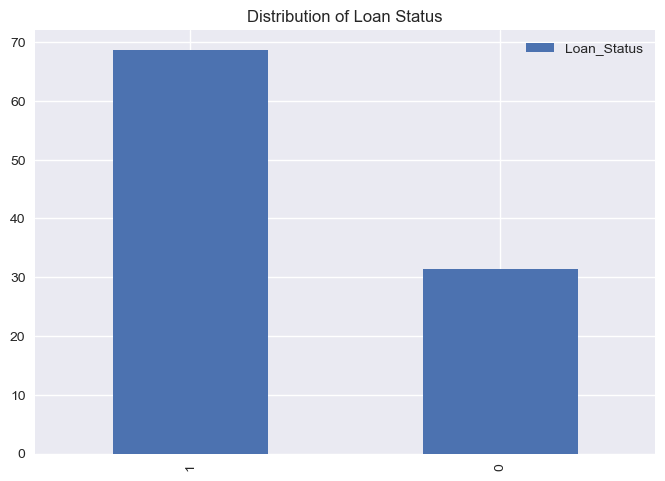

In [40]:
pd.DataFrame(y_train.value_counts(normalize = True) * 100).plot(kind = "bar")
plt.title("Distribution of Loan Status")
plt.show()

In [41]:
pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [42]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [43]:
clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [44]:
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [45]:
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': 5,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 9}

In [46]:
clf_model.best_score_

0.8004535147392291

In [47]:
bankloans_test_pred_dt = pd.DataFrame({'actual':y_test, 'predicted': clf_model.predict(X_test)})
bankloans_test_pred_dt = bankloans_test_pred_dt.reset_index(drop = True)

#predicted probability
bankloans_test_pred_dt["predicted_prob"] = pd.DataFrame([p[1] for p in clf_model.predict_proba(X_test)])

bankloans_test_pred_dt.head()

,actual,predicted,predicted_prob
0,0,1,0.868056
1,0,1,0.772549
2,1,1,0.868056
3,1,1,0.868056
4,1,1,0.772549


In [48]:
print(metrics.classification_report(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



In [49]:
metrics.confusion_matrix(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted)

array([[18, 20],
       [ 4, 81]], dtype=int64)

In [50]:
auc_score_test = metrics.roc_auc_score(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.7133


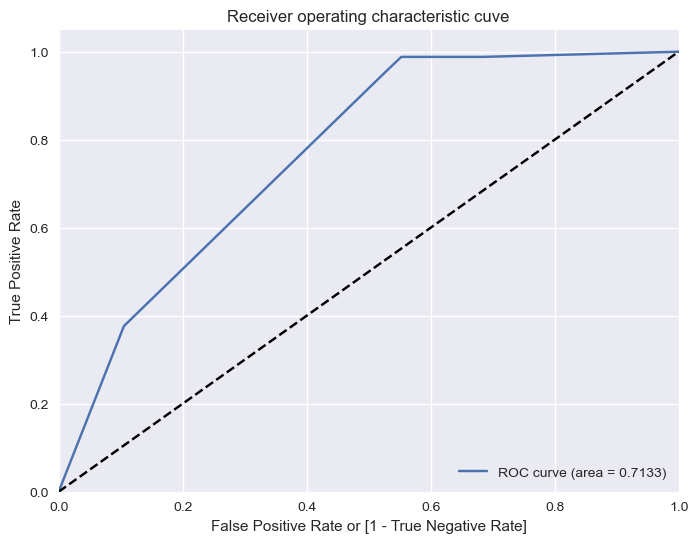

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()


In [52]:
print("Recall Score:",round(metrics.recall_score(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted) * 100,3))

Recall Score: 95.294


In [53]:
print("Precision Score:",round(metrics.precision_score(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted) * 100,3))

Precision Score: 80.198


In [54]:
metrics.f1_score(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted)

0.8709677419354839

In [55]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pdot
import graphviz as graphviz

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [59]:
dot_data = StringIO()

In [60]:
clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

In [61]:
export_graphviz(clf_best_model,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = X_train.columns.values,class_names = ["No","Yes"])

In [62]:
graph = pdot.graph_from_dot_data(dot_data.getvalue())

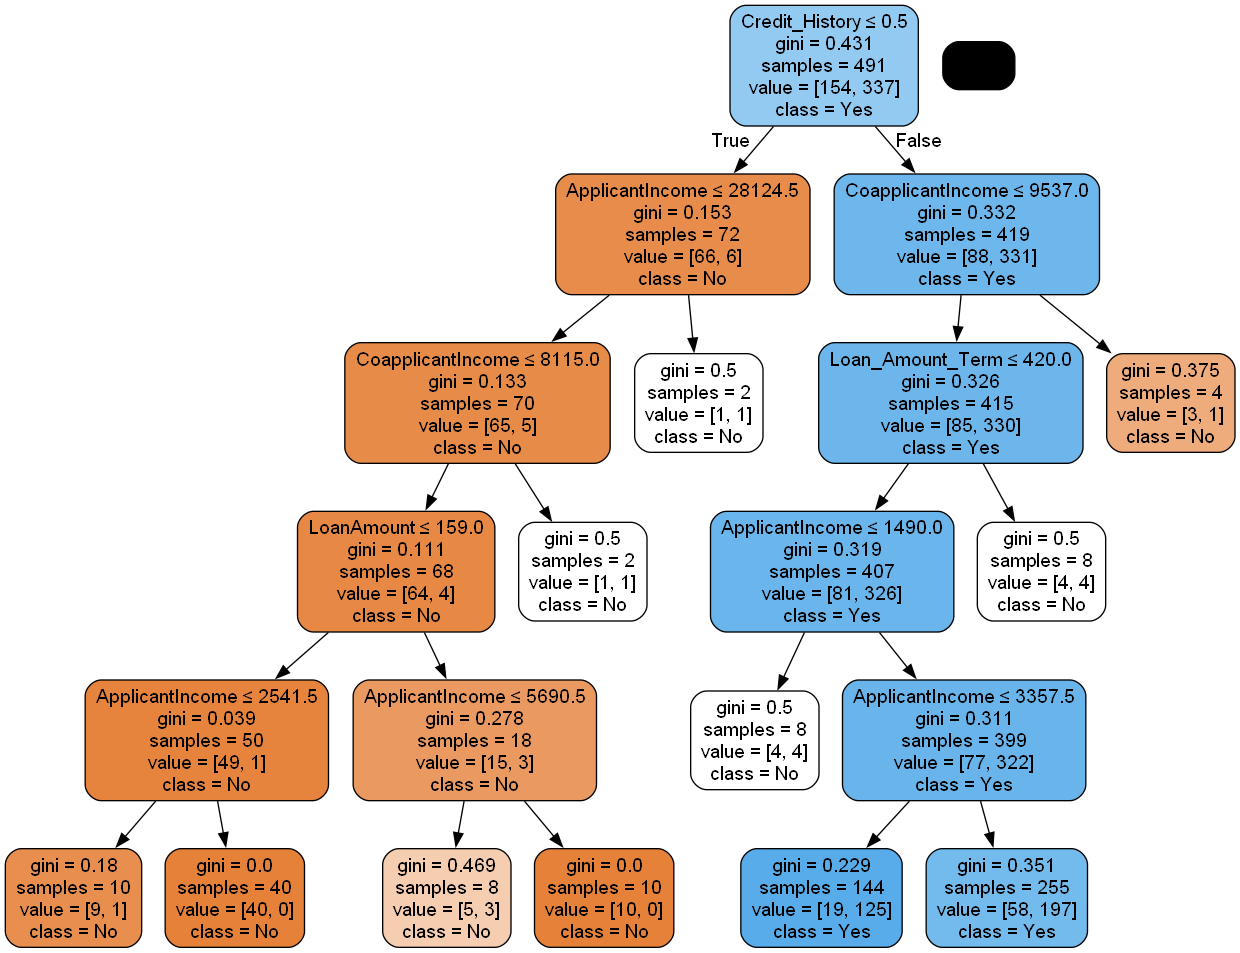

In [64]:
Image(graph.create_png())